In [31]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/a3/a4/101f0f3c0b057ce150af0e8493ab7fc10b98b066b7bd81ab01e96038a268/keras-3.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/12/26/ce14a11c328bfcf29341da42342cc48e4d65fb44e4e559c9e4036a88b750/optree-0.12.1-cp311-cp311-win_amd64.whl.metadata
     -----

In [33]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/p

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
data=pd.read_csv("C:/Users/Lezan/Documents/corizo/stockdataset.csv")

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [7]:
data.shape

(1009, 7)

In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [11]:
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
817,2021-05-05,504.989990,507.779999,494.630005,496.079987,496.079987,3129400
916,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2126200
373,2019-07-31,325.160004,331.769989,318.529999,322.989990,322.989990,6259500
283,2019-03-22,375.950012,376.429993,360.040009,361.010010,361.010010,8661300
179,2018-10-19,351.000000,355.799988,332.200012,332.670013,332.670013,16717200


In [12]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
ma_100_days = data.Close.rolling(100).mean()

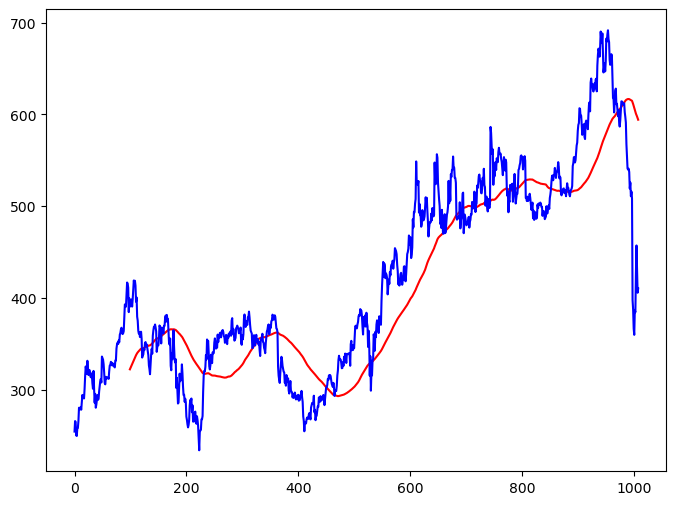

In [14]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'b')
plt.show()

In [15]:
ma_200_days = data.Close.rolling(200).mean()

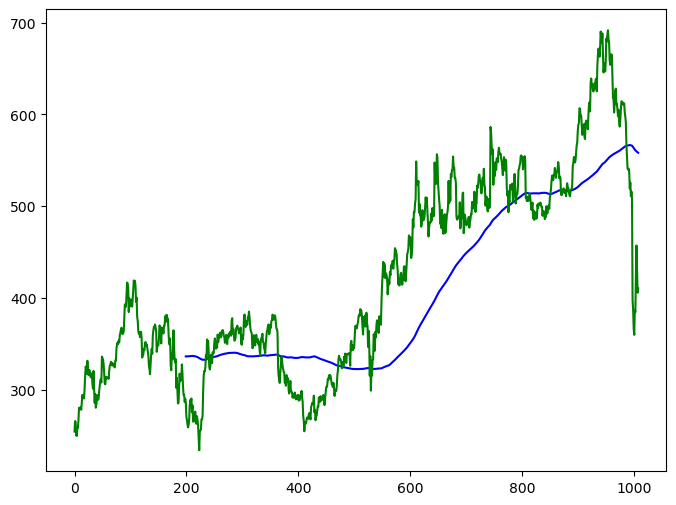

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

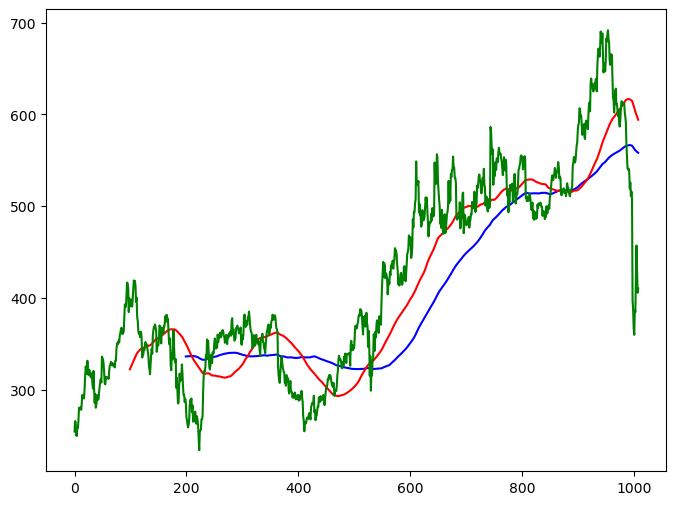

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'b')
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [18]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [19]:
data_train.shape[0]

807

In [20]:
data_test.shape[0]

202

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_train_scale = scaler.fit_transform(data_train)

In [23]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [24]:
x= np.array(x)
y =np.array(y)

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\Lezan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.1620
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0228
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - loss: 0.0160
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.0127
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 0.0146
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0177
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 0.0121
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 0.0124
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - loss: 0.0128
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - loss: 0.0130
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - loss: 0.0136
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - loss: 0.0102
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - loss: 0.0099
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step - loss: 0.0116
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - l

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
pas_100_days = data_train.tail(100)

In [30]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [31]:
data_test_scale  =  scaler.fit_transform(data_test)

In [32]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


In [34]:
scale =1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

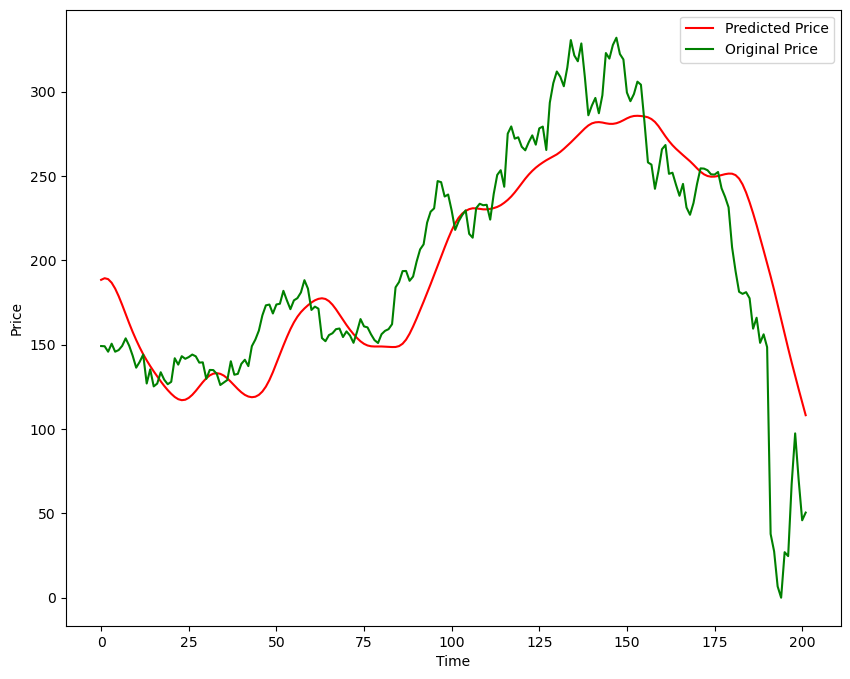

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Predictions Model.keras')